#### Importing the required packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import calendar


#### Loading the dataset

In [2]:
df = pd.read_csv('D:/Full_SatckDataAnalytics_Notes/india_air/AirQualityDataset.csv', encoding='cp1252')

C:\Users\ACER\AppData\Local\Temp\ipykernel_14628\226075881.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/Full_SatckDataAnalytics_Notes/india_air/AirQualityDataset.csv', encoding='cp1252')


In [3]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,2/1/1990
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,2/1/1990
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,2/1/1990
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,3/1/1990
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,3/1/1990


In [4]:
df.shape # It will display the number of rows and columns in a dataset

(435739, 13)

#### Information About the Dataset

Information about each column, their datatypes and number of non-null values for the same.

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435739 entries, 0 to 435738
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435739 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435739 non-null  object 
dtyp

The dataset consists primarily 5 different types pollutants (so2, no2, rspm, spm and pm2_5) measured over the years in different states and cities of India. 

Understanding the pollutants briefly.

* NO2: Nitrogen Dioxide and is emmitted mostly from combustion from power sources or transport.

* SO2: Sulphur Dioxide and is emmitted mostly from coal burning, oil burning, manufacturing of Sulphuric acid.

* spm: Suspended particulate matter and are known to be the deadliest form of air pollution. They are microscopic in 
  nature and are found to be suspended in earth's atmosphere.

* rspm: Respirable suspended particulate matter. A sub form of spm and are respnsible for respiratory diseases.

* pm2_5: Suspended particulate matter with diameters less than 2.5 micrometres. They tend to remain suspended for longer 
  durations and potentially very harmful.

****************************************************************************************************************

### Cleaning the dataset

We are having the date column in dataset. So for our futher convenience we will change its datatype to datetime,
and will also extract the year and month from the date column to find the insights accordingly.

In [6]:
df['date']=pd.to_datetime(df['date'])
df['year']=pd.DatetimeIndex(df['date']).year
df['month']=pd.DatetimeIndex(df['date']).month

While cleaning the dataset first we will drop the unnecessary columns.

There are some columns that will hardly add much values to the analysis therefore we are not including those in the 
further analysis. 
So out of the 13 columns we will drop the following : 
    - stn_code
    - agency
    - location_monitoring_station
    - sampling_date(as we are having date column with similar values)

In [7]:
df.drop(['stn_code','agency','location_monitoring_station','sampling_date'], inplace=True,axis=1)

In [8]:
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year,month
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01,1990,2
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990,2
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01,1990,2
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01,1990,3
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990,3


#### working with redundant data

* In type column, we have redundant data.
  We replaced all the similar types of location categories and got them down to only three following categories:

  1]. Residential

  2]. Industrial

  3]. Sensitive

* We also replaced some former names of the cities to their new names(like Bombay to Mumbai, Madras to Chennai) for their
  better analysis


In [9]:
df.replace({'type':{'Residential, Rural and other Areas':'Residential','RIRUO':'Residential',
                     'Residential and others':'Residential',
                     'Industrial Area':'Industrial','Industrial Areas':'Industrial',
                     'Sensitive Area':'Sensitive','Sensitive Areas':'Sensitive'},
            'state':{'Uttaranchal':'Uttarakhand'},
            'location':{'Bombay':'Mumbai','Yamunanagar':'Yamuna Nagar','Visakhapatnam':'Vishakhapatnam',
                        'Aurangabad (MS)':'Aurangabad','Anklesvar':'Ankleshwar','Bhubaneswar':'Bhubaneshwar',
                        'Silcher':'Silchar','Trivendrum':'Thiruvananthapuram','Trivandrum':'Thiruvananthapuram',
                        'Panjim':'Panaji','Turicorin':'Thoothukudi','Tuticorin':'Thoothukudi','Pondichery':'Pondicherry',
                        'Chandarpur':'Chandrapur','Baroda':'Vadodara','Madras':'Chennai','Cochin':'Kochi','Noida':'Noida',
                        'Ghaziabad':'Noida','Calcutta':'Kolkata'}}, inplace=True)

In [10]:
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year,month
0,Andhra Pradesh,Hyderabad,Residential,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990,2
1,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990,2
2,Andhra Pradesh,Hyderabad,Residential,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990,2
3,Andhra Pradesh,Hyderabad,Residential,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990,3
4,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990,3


***************************************************************************************************************

#### Describing the Dataset

Statistcal analysis of given dataset

In [11]:
df.describe() 

,so2,no2,rspm,spm,pm2_5,year,month
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000,435739.000000,435739.000000
mean,10.829414,25.809623,108.832707,220.783480,40.791467,2009.534164,6.503763
std,11.177187,18.503086,74.872460,151.395457,30.832525,4.791556,3.440810
min,0.000000,0.000000,0.000000,0.000000,3.000000,1987.000000,1.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000,2007.000000,4.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000,2010.000000,6.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000,2013.000000,10.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000,2015.000000,12.000000


##### Boxplot

Boxplot is used for graphically demonstrating the locality, spread and skewness of numerical data through their quartiles. 
Boxplots are useful as they show outliers within a data set. An outlier is an observation that is numerically distant from the rest of the data.

<AxesSubplot:>

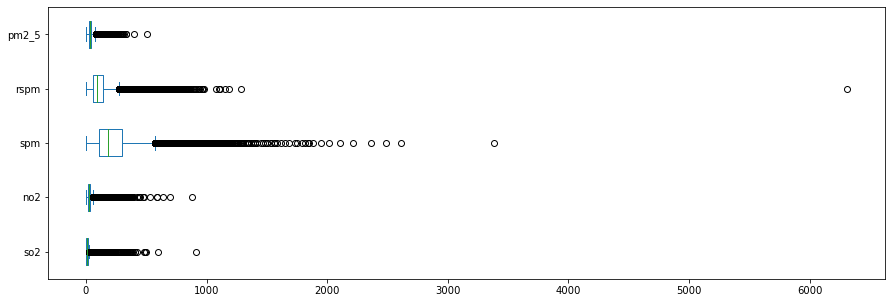

In [12]:
cols=['so2','no2','spm','rspm','pm2_5']
df[cols].plot(kind='box', figsize=(15,5), vert=False)

* It is always advisable to remove outliers. 

* But our AirQuality data is TimeSeries data.So in time series data, some outliers represents natural variations in the 
  population/readings, and they should be left as it is in your dataset. These are called true outliers.
    
* Therefore here we are not removing the outliers and proceedig further to work with missing values 


#### Working with missing values

Following table gives us the column names with the number of missing values and its percentage impact with respect to dataset

In [13]:
total_null = df.isnull().sum().sort_values(ascending=False)
percent_missing = round(total_null*100/len(df),2)
#total_null.sort_values(ascending=False)

In [14]:
pd.concat([total_null,percent_missing], axis = 1,keys=['Total missing Values','Percentage missing'])

,Total missing Values,Percentage missing
pm2_5,426425,97.86
spm,237384,54.48
rspm,40219,9.23
so2,34643,7.95
no2,16230,3.72
type,5390,1.24
state,0,0.00
location,0,0.00
date,0,0.00
year,0,0.00


The columns type(location type),SO2, NO2, rspm, spm and pm2_5 which contribute much to our analysis contains the missing values.
So, we need to handle the missing data properly.

So here first we will delete all those rows or records having the missing values for all the pollutants(SO2, NO2, rspm, 
spm and pm2_5).

In [15]:
df.drop(df[ (df['so2'].isnull()) & (df['no2'].isnull()) & (df['spm'].isnull()) & (df['rspm'].isnull()) & 
(df['pm2_5'].isnull())].index,inplace=True)


In [16]:
df.shape

(433073, 11)

###### For Catogorical data

Now let us consider the 'type' feature.
It represents the type of area where the data was recorded like industrial, residential, Sensitive etc.
Let us see how many types of area were considered


* The “type” feature of the AirQuality dataset is categorical.
  Here, we cannot compute mean and median. So, we can fill the missing values with the mode or most frequently occurring 
  class/category.

In [17]:
# We replaced the missing values in type column that is location type with mode() function

df['type'] = df['type'].fillna(df['type'].mode()[0])

###### For Numerical data

* Time series data has a lot of variations. 
* We will use 'Linear Interpolation' method to impute the missing values. 
* Here, the missing values are filled with incrementing or decrementing values. It is a kind of imputation technique, 
  which tries to plot a linear relationship between data points. It uses the non-null values available to compute the 
  missing points.

In [18]:
cols=['so2','no2','spm','rspm','pm2_5']

In [19]:
for x in cols:
    df[x].interpolate(inplace=True)
#df[cols].interpolate(inplace=True)

In [20]:
df.isnull().sum()

state           0
location        0
type            0
so2             0
no2             0
rspm         1035
spm            11
pm2_5       64788
date            0
year            0
month           0
dtype: int64

In [21]:
total_null = df.isnull().sum().sort_values(ascending=False)
percent_missing = round(total_null*100/len(df),2)
pd.concat([total_null,percent_missing], axis = 1,keys=['Total missing Values','Percentage missing'])

,Total missing Values,Percentage missing
pm2_5,64788,14.96
rspm,1035,0.24
spm,11,0.00
state,0,0.00
location,0,0.00
type,0,0.00
so2,0,0.00
no2,0,0.00
date,0,0.00
year,0,0.00


Here we can see the reduction in missing values and its impact on dataset

Still we can see some missing values that we could not fill. 
So for our further convenience we will fill these numerical missing values with 0 as there impact on the dataset is less.

In [22]:
df.fillna(0,inplace=True)

In [23]:
df.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
date        0
year        0
month       0
dtype: int64

In [24]:
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year,month
0,Andhra Pradesh,Hyderabad,Residential,4.8,17.4,0.0,0.0,0.0,1990-02-01,1990,2
1,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,0.0,0.0,0.0,1990-02-01,1990,2
2,Andhra Pradesh,Hyderabad,Residential,6.2,28.5,0.0,0.0,0.0,1990-02-01,1990,2
3,Andhra Pradesh,Hyderabad,Residential,6.3,14.7,0.0,0.0,0.0,1990-03-01,1990,3
4,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,0.0,0.0,0.0,1990-03-01,1990,3


********************************************************************************************************************

### Air Quality Index

##### What is Air Quality Index?

* Air Quality Index (AQI) is a number used to convey the quality of air by the government to the general public. 
* Air quality deteriorates with an increase in the concentration of pollutants. The Air Quality Index represents the severity 
  of pollution for ordinary people.
* According to the Indian Government (CPCB Central Pollution Control Board ), Indian AQI range is from 0-500, from 0 being good 
  and 500 being severe.
* The six major air pollutants are taken to calculate AQI, which are, Particulate Matter (PM 10 and PM 2.5), carbon 
  monoxide(CO), ozone (O3), nitrogen dioxide (NO2), and sulfur dioxide (SO2). AQI ranging from 0-500 has different pollutant 
  concentrations and associated health effects.

##### How to calculate the AQI?

* The formula to calculate AQI is the same as per the Indian CPCB and US-EPA(Environmental Protection Agency). 
* The AQI is calculated using the equations separately for parameters. 
* For example, if you wish to calculate AQI on the basis of four parameters, use the equation four times, and the worst 
  sub-index communicates the AQI. 
* A subindex is a linear function (two different yet related notions) of the concentration of pollutants.


#####                               Ip = [IHi – ILo / BPHi – BPLo] (Cp – BPLo) + ILo

Where,

  - Ip = Pollutant Index
  - Cp = Concentration of pollutants (Pollutants Reading)
  - BPHi = Pollutants high range measurement (concentration breakpoint i.e. greater than or equal to Cp)
  - BPLo = Pollutants low range measurement (concentration breakpoint i.e. less than or equal to Cp)
  - IHi = AQI value (high range) corresponding to BPHi
  - ILo = AQI value (low range) corresponding to BPLo


#### Functions for calculation of Air quality and its index (AQI Air Quality Index) 

##### Function to calculate the individual pollutant index

In [25]:
# Function to calculate the individual pollutant index

arr_poll=[]
def calculate_pollutants_index (poll_name,poll_reading):
    global arr_poll
    if poll_name =='so2':
        arr_poll= [0,40,80,380,800,1600]
    elif poll_name =='no2':
        arr_polle = [0,40,80,180,280,400]
    elif poll_name =='spm':
        arr_polle = [0,50,100,250,350,430]
    elif poll_name =='rspm':
        arr_poll = [0,30,60,90,120,250]
    elif poll_name =='pm2_5':
        arr_poll = [0,50,100,250,350,430]
        
    
    poll_index=0
    
    if(poll_reading <=arr_poll[1]):
        poll_index = (50/arr_poll[1])*poll_reading
        
    elif(poll_reading >arr_poll[1] and poll_reading <=arr_poll[2]):
        poll_index = (49/(arr_poll[2]-(arr_poll[1]+1)))*(poll_reading-(arr_poll[1]+1))+51
        
    elif(poll_reading >arr_poll[2] and poll_reading <=arr_poll[3]):
        poll_index = (99/(arr_poll[3]-(arr_poll[2]+1)))*(poll_reading-(arr_poll[2]+1))+101              
                      
    elif(poll_reading >arr_poll[3] and poll_reading <=arr_poll[4]):
        poll_index = (99/(arr_poll[4]-(arr_poll[3]+1)))*(poll_reading-(arr_poll[3]+1))+201              
                      
    elif(poll_reading >arr_poll[4] and poll_reading <=arr_poll[5]):
        poll_index = (99/(arr_poll[5]-(arr_poll[4]+1)))*(poll_reading-(arr_poll[4]+1))+301
                   
    elif(poll_reading >arr_poll[5]):
        poll_index = (99/arr_poll[5]+1)*(poll_reading -arr_poll[5]+1)
        
     
    return poll_index


##### Fucntion to calculate AQI : Air Quality Index

In [26]:
# Fucntion to calculate AQI : Air Quality Index

def calculate_AQI(si,ni,spi,rspi,pmi):
    aqi=0
    
    if(si>ni and si>spi and si>rspi and si>pmi):
        aqi=si
    elif(ni>si and ni>spi and ni>rspi and ni>pmi):
        aqi=ni
    elif(spi>si and spi>ni and spi>rspi and spi>pmi): 
        aqi=spi
    elif(rspi>si and rspi>ni and rspi>spi and rspi>pmi): 
        aqi=rspi
    elif(pmi>si and pmi>ni and pmi>rspi and pmi>spi):    
        aqi=pmi
        
    return aqi    

##### Function to calculate Air Quaity Status

In [27]:
# Function to calculate air quaity status

def calculate_Air_Quality(aqi):
    global air_quality
    if(aqi<=50):
        air_quality="Good"
    elif(aqi>50 and aqi<=100):   
        air_quality="Satisfactory"
    elif(aqi>100 and aqi<=150):   
        air_quality="Moderate" 
    elif(aqi>150 and aqi<=200):   
        air_quality="Poor"
    elif(aqi>200 and aqi<=300):   
        air_quality="Very Poor"
    elif(aqi>300):   
        air_quality="Hazardous"
        
    return air_quality    

*****************************************************************************************************************

In [28]:
# Calculated Individual pollutant index by calling the function calculate_pollutants_index()

for items in cols:
    df[items+'_index'] = df.apply(lambda x: calculate_pollutants_index(items, x[items]),axis=1)

In [29]:
# Calculated Air Quality index by calling the function calculate_AQI()

df['AQI'] = df.apply(lambda x: calculate_AQI(x['so2_index'],x['no2_index'],x['spm_index'],
                                                                     x['rspm_index'],x['pm2_5_index']),axis=1)

In [30]:
# df_yearwise_AQI['Air Quality']= df_yearwise_AQI.apply(lambda x: calculate_Air_Quality(x['AQI']), axis=1)

In [31]:
df_index=df.copy(deep=True)
df_index=df[['state','location','type','year','so2_index','no2_index','spm_index','rspm_index','pm2_5_index','AQI']]

In [32]:
df_index.head()

,state,location,type,year,so2_index,no2_index,spm_index,rspm_index,pm2_5_index,AQI
0,Andhra Pradesh,Hyderabad,Residential,1990,6.000,21.750,0.0,0.0,0.0,21.750
1,Andhra Pradesh,Hyderabad,Industrial,1990,3.875,8.750,0.0,0.0,0.0,8.750
2,Andhra Pradesh,Hyderabad,Residential,1990,7.750,35.625,0.0,0.0,0.0,35.625
3,Andhra Pradesh,Hyderabad,Residential,1990,7.875,18.375,0.0,0.0,0.0,18.375
4,Andhra Pradesh,Hyderabad,Industrial,1990,5.875,9.375,0.0,0.0,0.0,9.375


##### Trend of emission of pollutants in india over the years

Text(0, 0.5, 'Pollutants')

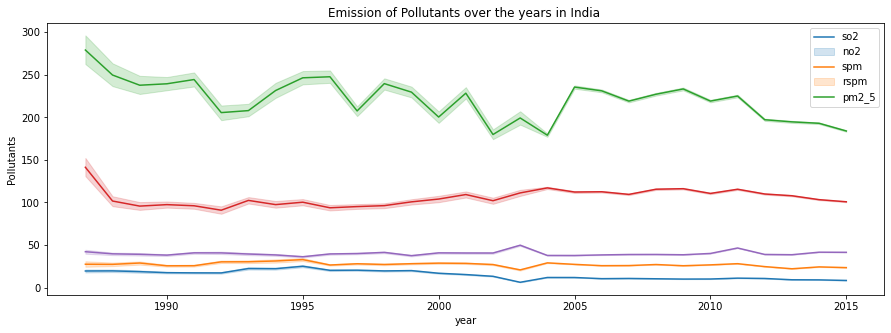

In [33]:
plt.figure(figsize=(15,5))
sns.lineplot(x='year',y='so2',data=df)
sns.lineplot(x='year',y='no2',data=df)
sns.lineplot(x='year',y='spm',data=df)
sns.lineplot(x='year',y='rspm',data=df)
sns.lineplot(x='year',y='pm2_5',data=df)

plt.title('Emission of Pollutants over the years in India ')
plt.legend(['so2','no2','spm','rspm','pm2_5'])
plt.xlabel('year')
plt.ylabel('Pollutants')

In [48]:
# df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year,month,so2_index,no2_index,spm_index,rspm_index,pm2_5_index,AQI
0,Andhra Pradesh,Hyderabad,Residential,4.8,17.4,0.0,0.0,0.0,1990-02-01,1990,2,6.000,21.750,0.0,0.0,0.0,21.750
1,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,0.0,0.0,0.0,1990-02-01,1990,2,3.875,8.750,0.0,0.0,0.0,8.750
2,Andhra Pradesh,Hyderabad,Residential,6.2,28.5,0.0,0.0,0.0,1990-02-01,1990,2,7.750,35.625,0.0,0.0,0.0,35.625
3,Andhra Pradesh,Hyderabad,Residential,6.3,14.7,0.0,0.0,0.0,1990-03-01,1990,3,7.875,18.375,0.0,0.0,0.0,18.375
4,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,0.0,0.0,0.0,1990-03-01,1990,3,5.875,9.375,0.0,0.0,0.0,9.375


##### Exploring the Air pollution Year wise

In [34]:
df_yearwise_AQI= df.groupby(['year'], as_index=False)['so2_index','no2_index','spm_index','rspm_index','pm2_5_index'].mean()

#Called the function calculate_AQI() for year wise AQI
df_yearwise_AQI['AQI'] = df_yearwise_AQI.apply(lambda x: calculate_AQI(x['so2_index'],x['no2_index'],x['spm_index'],
                                                                     x['rspm_index'],x['pm2_5_index']),axis=1)

#Called the function ccalculate_Air_Quality to display the quality of air per year
df_yearwise_AQI['Air Quality']= df_yearwise_AQI.apply(lambda x: calculate_Air_Quality(x['AQI']), axis=1)

df_yearwise_AQI

C:\Users\ACER\AppData\Local\Temp\ipykernel_14628\387852924.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_yearwise_AQI= df.groupby(['year'], as_index=False)['so2_index','no2_index','spm_index','rspm_index','pm2_5_index'].mean()


,year,so2_index,no2_index,spm_index,rspm_index,pm2_5_index,AQI,Air Quality
0,1987,23.850631,31.713131,159.957985,164.110771,41.976766,164.110771,Poor
1,1988,24.045663,32.758021,151.763477,161.622539,39.628341,161.622539,Poor
2,1989,23.051881,34.152189,148.634024,162.746048,39.069751,162.746048,Poor
3,1990,21.671016,31.460279,148.923797,171.951076,38.149369,171.951076,Poor
4,1991,21.181909,31.653942,149.729729,168.224877,40.819331,168.224877,Poor
5,1992,21.396836,36.722818,132.512197,150.536294,40.753762,150.536294,Poor
6,1993,26.392616,35.534022,134.114494,186.425456,39.469173,186.425456,Poor
7,1994,26.617350,35.647986,140.016936,178.202660,38.375709,178.202660,Poor
8,1995,30.114366,37.288412,150.400194,179.538432,36.261274,179.538432,Poor
9,1996,24.963825,32.783894,151.458795,176.745865,39.541592,176.745865,Poor


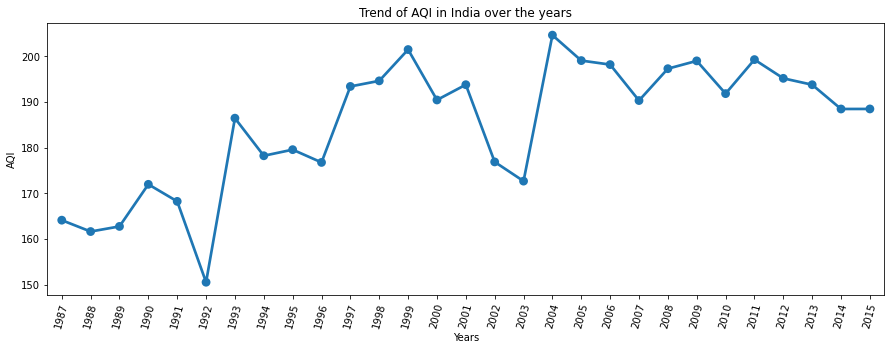

In [35]:
df_yearwise_AQI
#df_new=df_index.groupby(['year'], as_index=False)['AQI'].mean()
plt.figure(figsize=(15,5))
sns.pointplot(x='year',y='AQI', data = df_yearwise_AQI)
plt.title("Trend of AQI in India over the years")
plt.xlabel("Years")
plt.xticks(rotation=75)
plt.ylabel("AQI")
plt.show()

* It shows the trend of Air Quality Index in India over the years( from 1990 to 2015)

##### Exploring the Air pollution State wise over the years (1987 to 2015)

In [36]:
df_statewise_AQI= df.groupby(['state'], as_index=False)['so2_index','no2_index','spm_index','rspm_index',
                                                              'pm2_5_index'].mean()

#Called the function calculate_AQI() for statewise AQI
df_statewise_AQI['AQI'] = df_statewise_AQI.apply(lambda x: calculate_AQI(x['so2_index'],x['no2_index'],x['spm_index'],
                                                                     x['rspm_index'],x['pm2_5_index']),axis=1)

#Called the function calculate_Air_Quality to display the quality of air 
df_statewise_AQI['Air Quality']= df_statewise_AQI.apply(lambda x: calculate_Air_Quality(x['AQI']), axis=1)



C:\Users\ACER\AppData\Local\Temp\ipykernel_14628\1506105784.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_statewise_AQI= df.groupby(['state'], as_index=False)['so2_index','no2_index','spm_index','rspm_index',


In [37]:
# df_statewise_AQI.sort_values(by='AQI', ascending=True)
df_statewise_AQI.sort_values(by='AQI', ascending=False)

,state,so2_index,no2_index,spm_index,rspm_index,pm2_5_index,AQI,Air Quality
14,Jharkhand,29.212447,53.894562,142.348039,293.485388,50.964061,293.485388,Very Poor
30,Uttar Pradesh,15.432066,34.191517,190.238458,283.002032,47.961826,283.002032,Very Poor
31,Uttarakhand,29.775810,32.962337,171.487635,282.082350,66.003527,282.082350,Very Poor
25,Punjab,13.140317,35.030899,127.895957,270.597600,40.804351,270.597600,Very Poor
13,Jammu & Kashmir,9.022065,15.221715,125.589984,263.091292,48.564474,263.091292,Very Poor
11,Haryana,17.319013,27.805830,159.002797,250.726142,32.108782,250.726142,Very Poor
8,Delhi,10.779164,64.020548,193.651395,248.690233,58.409682,248.690233,Very Poor
26,Rajasthan,9.609383,37.785933,181.192189,236.545169,43.600060,236.545169,Very Poor
5,Chhattisgarh,16.226655,31.276166,154.742612,234.847931,0.000000,234.847931,Very Poor
3,Bihar,23.050873,45.430928,161.577221,216.019667,0.000000,216.019667,Very Poor


In [38]:
# Function to add the data lables
        
def addlabels(state,aqi):
    for i in range(len(state)):
        plt.text(i, round(aqi[i],2), round(aqi[i],2), ha='center')

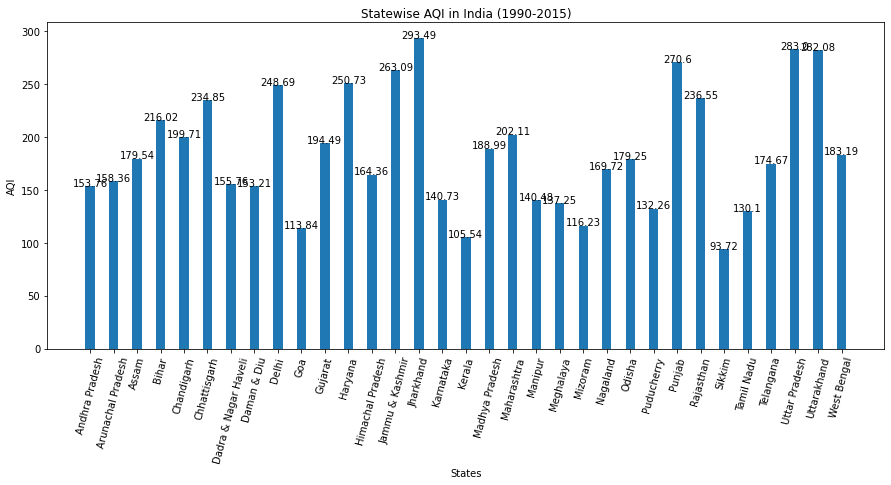

In [39]:

plt.figure(figsize=(15,6))
plt.bar(df_statewise_AQI['state'],df_statewise_AQI['AQI'],width = 0.4)
plt.xlabel("States")
plt.ylabel("AQI")
plt.title("Statewise AQI in India (1990-2015)")
addlabels(df_statewise_AQI['state'],df_statewise_AQI['AQI']) 

plt.xticks(rotation=75)
plt.show()

* Above graph shows the Air Quality Index in all states of India during 1990 to 2015.

##### Exploring the Air pollution City wise

In [40]:
df_citywise_AQI= df.groupby(['location'],as_index=False)['so2_index','no2_index','spm_index','rspm_index','pm2_5_index'].mean()

df_citywise_AQI['AQI'] = df_citywise_AQI.apply(lambda x: calculate_AQI(x['so2_index'],x['no2_index'],x['spm_index'],
                                                                     x['rspm_index'],x['pm2_5_index']),axis=1)

df_citywise_AQI['Air Quality']= df_citywise_AQI.apply(lambda x: calculate_Air_Quality(x['AQI']), axis=1)

df_citywise_AQI.sort_values(by='AQI',ascending=False)

C:\Users\ACER\AppData\Local\Temp\ipykernel_14628\3703978172.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_citywise_AQI= df.groupby(['location'],as_index=False)['so2_index','no2_index','spm_index','rspm_index','pm2_5_index'].mean()


,location,so2_index,no2_index,spm_index,rspm_index,pm2_5_index,AQI,Air Quality
154,Lucknow,12.509132,38.930183,195.689870,344.527061,46.751538,344.527061,Hazardous
82,Gajroula,46.125848,34.240783,179.090872,329.441748,31.989736,329.441748,Hazardous
110,Jalandhar,16.137873,35.981179,126.420149,320.819847,40.601481,320.819847,Hazardous
208,Rai Bareilly,13.305178,19.430710,186.034411,319.006437,58.164568,319.006437,Hazardous
47,Chittorgarh,25.735714,61.213946,150.724935,318.613281,42.322494,318.613281,Hazardous
...,...,...,...,...,...,...,...,...
189,Nizamabad,6.018519,15.509259,68.031327,93.245211,0.000000,93.245211,Satisfactory
260,Tirupati,5.227342,13.661725,91.591458,81.395151,0.000000,91.591458,Satisfactory
26,Belgaum,5.146361,18.296514,87.312772,83.265632,58.107689,87.312772,Satisfactory
232,Sanguem,6.853554,12.968750,82.406041,79.252366,28.326415,82.406041,Satisfactory


In [41]:
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year,month,so2_index,no2_index,spm_index,rspm_index,pm2_5_index,AQI
0,Andhra Pradesh,Hyderabad,Residential,4.8,17.4,0.0,0.0,0.0,1990-02-01,1990,2,6.000,21.750,0.0,0.0,0.0,21.750
1,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,0.0,0.0,0.0,1990-02-01,1990,2,3.875,8.750,0.0,0.0,0.0,8.750
2,Andhra Pradesh,Hyderabad,Residential,6.2,28.5,0.0,0.0,0.0,1990-02-01,1990,2,7.750,35.625,0.0,0.0,0.0,35.625
3,Andhra Pradesh,Hyderabad,Residential,6.3,14.7,0.0,0.0,0.0,1990-03-01,1990,3,7.875,18.375,0.0,0.0,0.0,18.375
4,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,0.0,0.0,0.0,1990-03-01,1990,3,5.875,9.375,0.0,0.0,0.0,9.375


##### Exploring the Air pollution location type wise

In [42]:
df_loctypewise_AQI=df.groupby(['type'], as_index=False)['so2_index','no2_index','spm_index','rspm_index','pm2_5_index'].mean()

df_loctypewise_AQI['AQI']=df_loctypewise_AQI.apply(lambda x: calculate_AQI(x['so2_index'],x['no2_index'],x['spm_index'],
                                                                     x['rspm_index'],x['pm2_5_index']),axis=1)


df_loctypewise_AQI['Air Quality']= df_loctypewise_AQI.apply(lambda x: calculate_Air_Quality(x['AQI']), axis=1)

C:\Users\ACER\AppData\Local\Temp\ipykernel_14628\2811328530.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_loctypewise_AQI=df.groupby(['type'], as_index=False)['so2_index','no2_index','spm_index','rspm_index','pm2_5_index'].mean()


In [43]:
df_loctypewise_AQI

,type,so2_index,no2_index,spm_index,rspm_index,pm2_5_index,AQI,Air Quality
0,Industrial,16.081946,35.666547,140.859127,207.776496,45.114317,207.776496,Very Poor
1,Residential,11.829118,29.709729,138.588444,188.034395,37.493591,188.034395,Poor
2,Sensitive,7.529891,24.552032,139.833250,150.656338,39.914826,150.656338,Poor


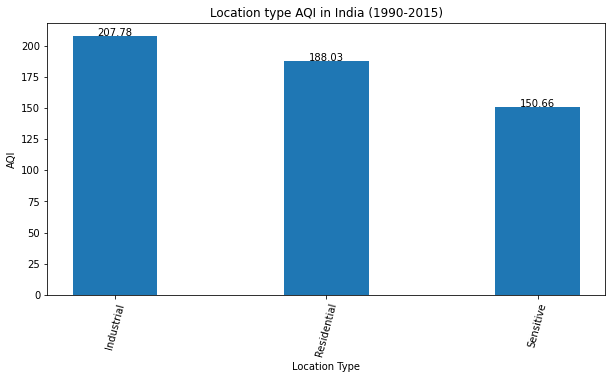

In [44]:
plt.figure(figsize=(10,5))
plt.bar(df_loctypewise_AQI['type'],df_loctypewise_AQI['AQI'], width=0.4)
plt.xlabel("Location Type")
plt.ylabel("AQI")
plt.title("Location type AQI in India (1990-2015)")
addlabels(df_loctypewise_AQI['type'],df_loctypewise_AQI['AQI']) 

plt.xticks(rotation=75)
plt.show()



* In above chart we have shown the AQI as per the type of the location that is Industrial, Residential and Sensitive.
* As you can see the highest AQI(207.78) is of Industrial area, which concludes that Industrial area caused the highest 
  pollution as compared with residential and sensitive during the years 1990 to 2015.

##### Exploring the Air pollution month wise

In [45]:
df_monthwise_AQI=df.groupby(['month'], as_index=False)['so2_index','no2_index','spm_index','rspm_index','pm2_5_index'].mean()

df_monthwise_AQI['AQI']=df_monthwise_AQI.apply(lambda x: calculate_AQI(x['so2_index'],x['no2_index'],x['spm_index'],
                                                                    x['rspm_index'],x['pm2_5_index']),axis=1)


df_monthwise_AQI['Air Quality']= df_monthwise_AQI.apply(lambda x: calculate_Air_Quality(x['AQI']), axis=1)

C:\Users\ACER\AppData\Local\Temp\ipykernel_14628\3467203952.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_monthwise_AQI=df.groupby(['month'], as_index=False)['so2_index','no2_index','spm_index','rspm_index','pm2_5_index'].mean()


In [46]:
df_monthwise_AQI.head()

,month,so2_index,no2_index,spm_index,rspm_index,pm2_5_index,AQI,Air Quality
0,1,14.036732,33.886250,143.041347,209.405803,40.268822,209.405803,Very Poor
1,2,13.784927,33.090418,142.725064,207.286640,40.507094,207.286640,Very Poor
2,3,13.540931,32.347250,141.561597,205.420133,40.229209,205.420133,Very Poor
3,4,13.343415,31.587037,141.885868,198.187054,39.786168,198.187054,Poor
4,5,13.247457,31.192621,141.420797,196.690649,40.646310,196.690649,Poor


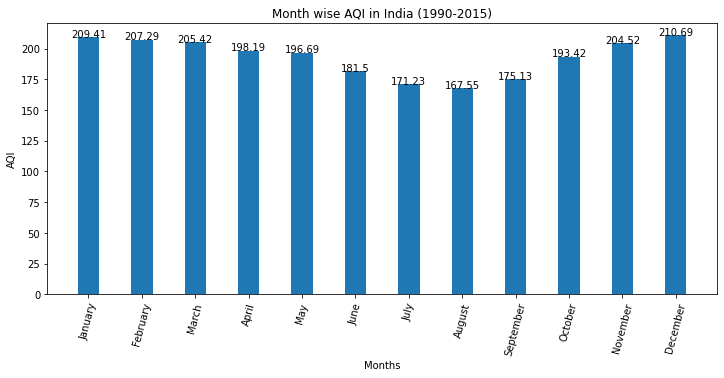

In [47]:
month_names=df_monthwise_AQI['month'].apply(lambda x:calendar.month_name[x])

plt.figure(figsize=(12,5))
plt.bar(month_names,df_monthwise_AQI['AQI'], width=0.4)
plt.xlabel("Months")
plt.ylabel("AQI")
plt.title("Month wise AQI in India (1990-2015)")
addlabels(month_names,df_monthwise_AQI['AQI']) 

plt.xticks(rotation=75)
plt.show()

This shows the monthwise AQI in India from 1990 to 2015

* From above graph we can say that, the air quality starts deteriorating in the late october till March,April. 
  Winters are the worst hit season in terms of the pollution in India.
  
* Air quality starts improving in the late May, with the onset of Monsoon season.

### Conclusion

* AQI in India has been increasing over the years.

* It is found that AQI for Industrial area is on higher side as compared with the residential and sensitive area, 
   which concludes that Industrial area’s causing more pollution in India.
    
* Winters are the worst hit season in terms of the pollution in India and air quality starts improving in the late May, 
   with the onset of Monsoon season.
